# CQF EXAM N3 SOLUTION


Summary Table

| CQF Candidate   |
| ----------- |
| Alan Rodriguez |
| June 2023 Cohort |

In [1]:
from IPython.display import display, HTML

### Table Contents <a id="table_contents"></a>

- [1. Question 1: Voting Classifiers](#Q1)
- [2. Question 2: Regularization parameter C in SVM](#Q2)
    - [Example1 ](#Q2examples1)
    - [Example2 ](#Q2examples2)
- [3. Question 3: RFC Model](#Q3)
     - [Understanding the data](#Q3step1)
     - [Data Exploration](#Q3step2)
     - [Creating Target](#Q3step3)
     - [Feature Engineering and Penalized Classification](#Q3step4)
     - [Correlation Analysis](#Q3step5)
     - [Feature Selection](#Q3step6)
     - [Visualization of feature importance](#Q3step7)
     - [Analysis of Variance & t-test](#Q3step8)
     - [Clean and Transform data](#Q3step9)
     - [Modelling and Hyperparameters Tuning](#Q3step10)
     - [ROC curve](#Q3step11)
     - [Confusion Matrix](#Q3step12)
     - [Classification Report](#Q3step13)
     - [Backtesting and Trading Strategy](#Q3step14)

     
     
     
     

In [2]:
print("Importing Packages") 
import pandas as pd
import numpy as np
from numpy import *
import scipy.stats as stats0
from scipy.stats import norm as norm0
import math as math0
from tabulate import tabulate  
import sympy as sp
import scipy.stats as si
import matplotlib
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from pandas.plotting import autocorrelation_plot
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from scipy import stats
warnings.filterwarnings('ignore')

Importing Packages


<a id="Q1"></a>
# Questions:
## Q1. What are voting classifiers in ensemble learning?

#### Answer:
A ***Voting Classifier*** (Supervised ML) is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.

First lets define **Ensemble Learning**:

- **Ensemble Learning methods** are machine learning techniques that combines a concrete finite set of alternative models in order to produce one optimal predictive model with a better overall performance. Its inside the family of  Supervised Learning models.
- ***Ensemble Learning enhances the accuracy and resilience of the forecast by merging the predictions from multiple models while also aiming to mitigate errors or biases that could exist in individual models by using the aggregate intelligence of the ensemble model***. This approach not only enhances accuracy but also provides resilience against uncertainties in the data.
- Ensemble models combine multiple hypotheses to form a better hypothesis.


Lets explain the ***different Ensemble techniques***: it can be classified as Heterogenous and Homogeneous models 
- ***Voting Classifiers (Heterogeneous)*** can be divided in Majority, Weighted or Soft Voting (*more details below*)
    - ***Majority or Max Voting***: each model is considered a vote. The predictions which gets the majority of the model's votes are used as the final prediction. In other words, it predicts the class label that has been predicted most frequently by the classification models.
    - ***Soft or Averaging Voting***: average the predictions from all models.
    - ***Weighted Voting***:  Each models is assigned a specific weights, which defines the importance of each model for prediction outcome. 
- ***Stacking (Heterogenous)***: uses the predictions from multiple models (for example decision tree, knn or svm) to build a new model.Basically it involves fitting many different model types on the same data to learn the best combination for the predictions.
- ***Blending***: uses only a holdout set (validation) from the train set to make predictions.
- ***Bagging or Bootstrap Aggregating (Homogenous)***: this technique uses different subsets (bags) to get a fair idea of the distribution (complete set). Bagging involves fitting many decision trees on different sets  of the same dataset and averaging those predictions.
- ***Boosting (Homogenous)***: involves adding ensemble models sequentially that correct the predictions made by prior models and outputs a weighted average of the predictions.


**Voting Classifiers with Examples:** What is voting classifier?

- A Voting Classifier aggregates the findings of each classifier and predicts the output class based on the pre set decision rule.
- Instead of creating separate models and finding the accuracy for each model, it generates a single model which is trained by the subset of individual models and predicts the output class based on their combined results. 

***Example of a Hard or Majority Voting Classifier:***
- In a hard voting classifier, each individual classifier model in the ensemble makes a single prediction, and the final prediction is determined by a majority vote. The class that receives the most votes among the individual classifiers is the predicted class.
  - Example of Hard Voting Classifier:
  - We have three classifiers (Classifiers A, B, and C) in an ensemble model, and those are used for binary classification (Class 0 or Class 1). 
  - If Classifier A predicts Class 0, Classifier B predicts Class 1, and Classifier C predicts Class 1, the hard voting classifier would predict Class 1 because it received the most votes (2/3).

***Example of a Soft or Average Voting Classifier:***
- In a soft voting classifier, the individual classifiers not only make class predictions but also provide probability estimates for each class. The final prediction is determined by averaging the class probabilities from each classifier and selecting the class with the highest average probability.

  - Example of Soft Voting Classifier:
  - We have three classifiers(Classifiers X, Y, and Z), and they provide probability estimates for Class 0 and Class 1. 
  - For a particular data point, if the class probabilities predicted by the classifiers are as follows:
    - Classifier X: P(Class 0) = 0.6, P(Class 1) = 0.4
    - Classifier Y: P(Class 0) = 0.3, P(Class 1) = 0.7
    - Classifier Z: P(Class 0) = 0.4, P(Class 1) = 0.6
  - The soft voting classifier would calculate the average probabilities for each class:
     - Average P(Class 0) = (0.6 + 0.3 + 0.4) / 3 = 0.433
     - Average P(Class 1) = (0.4 + 0.7 + 0.6) / 3 = 0.567
  - The soft voting classifier would predict Class 1 because it has the highest average probability.

- [Top](#table_contents) 

<a id="Q2"></a>
### Question 2. 
### Explain the role of the regularization parameter C in a Support Vector Machine (SVM) model.
### How does varying C parameter affects the model's bias and variance trade-off?

#### Answer:

In a **Support Vector Machine (SVM), the regularization C ("Cost") parameter**  plays a crucial role in balancing the the trade-off between achieving a low training error and a low testing error (bias-variance trade-off). 

- The ***regularization cost parameter C*** controls the trade-off between maximizing the margin (minimizing the classification error by allowing margin violations) and minimizing the classification error on the training data. Consequently, it plays a significat role in the mathematical formulation of SVM and has important implications for the model's complexity and generalization performance.


- The ***regularization cost parameter C*** is involved in the mathematical formulation of the optimization problem. The standard soft-margin SVM optimization problem can be written as follows:

    - Minimize:
    $$ 1/2 * ||w||^2 + C * Σξ $$

    - Subject to:
$$ yᵢ(wᵀxᵢ + b) ≥ 1 - ξᵢ,$$ 
$$ξᵢ ≥ 0,$$ 

   - In this formulation, C appears as a multiplier on the summation term (Σξ), representing the total margin violations. The optimization aims to minimize the magnitude of the weight vector (w) while controlling the influence of the cost parameter C on the margin violations (ξᵢ).




Lets do first a quick overview of  **SVM models**:

- **Support Vector Machine (SVM) models** are tools for classification and regression tasks. A SVM model aims to find the optimal hyperplane that separates data points of different classes while maximizing the margin, which is the distance between the hyperplane and the nearest support vectors. SVM models can be fine-tuned using regularization parameters to control the trade-off between model complexity and generalization performance.

- The main parameters are:
    - **Regularization C  (Cost Parameter)**: primary regularization parameter that controls the trade-off between achieving a low training error and a low testing error.
    - **Regularization Gamma paramter (γ)**: The gamma parameter defines how far the influence of a single training example reaches. It affects the shape of the decision boundary and can be considered a regularization parameter for models using the radial basis function (RBF) kernel.



Comparing the effect of different regularizaiton C parameters values: (**How does varying C parameter affects the model's bias and variance trade-off?**)

- Returning back to the **regularization C ("Cost") paramter**. A high C value leads to low bias but high variance, while a low C value leads to high bias but low variance. 

**Small C paramter (C < 1): allows for more margin violations (misclassifications) and leads to a simpler model with higher bias and lower variance**
- When parameter C has a small value, the model places a higher priority in maximizing the margin. As a result the SVM model tolerates some degree of classification errors (misclassified training points) and therefore maintains a larger margin.
- As a result, this leads to a simpler model with higher bias and lower variance.
- The decision boundary may be more robust and less prone to overfitting but may result in some training errors.
- A small C value encourages a wider margin, allowing for more margin violations (classification errors).


**Large C paramter(C > 1): penalizes margin violations more heavily and results in a more complex model with lower bias but potentially higher variance.**

- When C has a large value, it places a higher priority on classifying all training points correctly.
- SVM penalizes margin violations (classification errors) more heavily, which results in a smaller margin.
- A smaller margin leads to a more complex model that fits the training data closely.
- This results in lower bias but potentially higher variance, making the model more prone to overfitting.
- A large C value prioritizes accurate classification, even if it results in a smaller margin and fewer margin violations.



<a id="Q2examples1"></a>

### Q2  Example #1 of how does varying regularization cost C parameter affects the SVM model's bias and variance trade-off?


Generate an examplet dataset

Split the dataset into training and testing sets

Create lists to save the accuracy values

Create a list with the range of C parameter values for the exercise
[0.001, 0.01, 0.1, 1, 10, 100]

Train and evaluate SVM models with different C parameter values
SVM model output
[0.7625, 0.88, 0.8975, 0.895, 0.8925, 0.8925]
[0.66, 0.86, 0.89, 0.89, 0.88, 0.88]

Plot the bias-variance trade-off


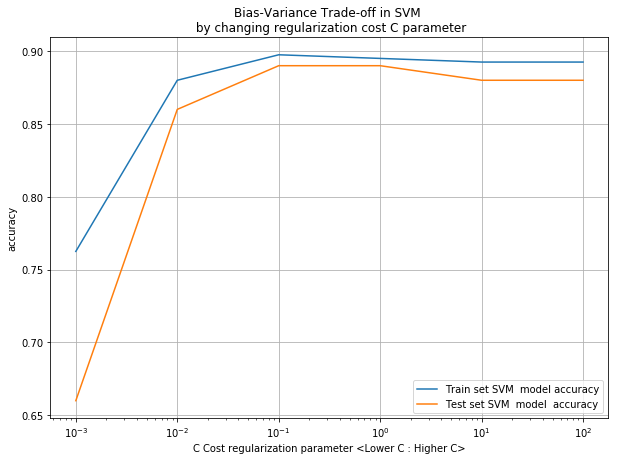

A high C parameter value leads to low bias but high variance, while a low C parameter value leads to high bias but low variance. 


In [3]:
print("Generate an examplet dataset")
seed_n=2023
x_data, y_data = datasets.make_classification(n_samples=500, 
                                    n_features=3, 
                                    n_informative=3, 
                                    n_redundant=0, 
                                    random_state=seed_n)
print()
print("Split the dataset into training and testing sets")
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=seed_n)
print()
print("Create lists to save the accuracy values")
ex_train_accuracies = []
ex_test_accuracies = []
print()
print("Create a list with the range of C parameter values for the exercise")
c_parameter_values = [0.001, 0.01, 0.1, 1, 10, 100]
print(c_parameter_values)
print()
print("Train and evaluate SVM models with different C parameter values")
for C in c_parameter_values:
    svm = SVC(C=C, kernel='linear', random_state=seed_n)
    svm.fit(x_train, y_train)
    y_train_pred = svm.predict(x_train)
    y_test_pred = svm.predict(x_test)
    ex_train_accuracy = accuracy_score(y_train, y_train_pred)
    ex_test_accuracy = accuracy_score(y_test, y_test_pred)
    ex_train_accuracies.append(ex_train_accuracy)
    ex_test_accuracies.append(ex_test_accuracy)
    del svm
    del y_train_pred
    del y_test_pred

print("SVM model output")
print(ex_train_accuracies)
print(ex_test_accuracies)
print()
print("Plot the bias-variance trade-off")
plt.figure(figsize=(10, 7))
plt.grid(True)
plt.semilogx(c_parameter_values, ex_train_accuracies, label='Train set SVM  model accuracy')
plt.semilogx(c_parameter_values, ex_test_accuracies, label='Test set SVM  model  accuracy')
plt.xlabel('C Cost regularization parameter <Lower C : Higher C>')
plt.ylabel('accuracy')
plt.title('Bias-Variance Trade-off in SVM \n by changing regularization cost C parameter')
plt.legend()
plt.show()
plt.close();
del ex_train_accuracies
del ex_test_accuracies
del c_parameter_values
del x_data
del y_data 
del x_train
del x_test
del y_train
del y_test


print("A high C parameter value leads to low bias but high variance, while a low C parameter value leads to high bias but low variance. ")

- [Top](#table_contents) 

<a id="Q2examples2"></a>
## Q2 Example 2 of how does varying regularization cost C parameter affects the SVM model's bias and variance trade-off?

Split the dataset into training and testing sets

Create lists to save the accuracy values

Create a list with the range of C parameter values for the exercise

Train and evaluate SVM models with different C parameter values


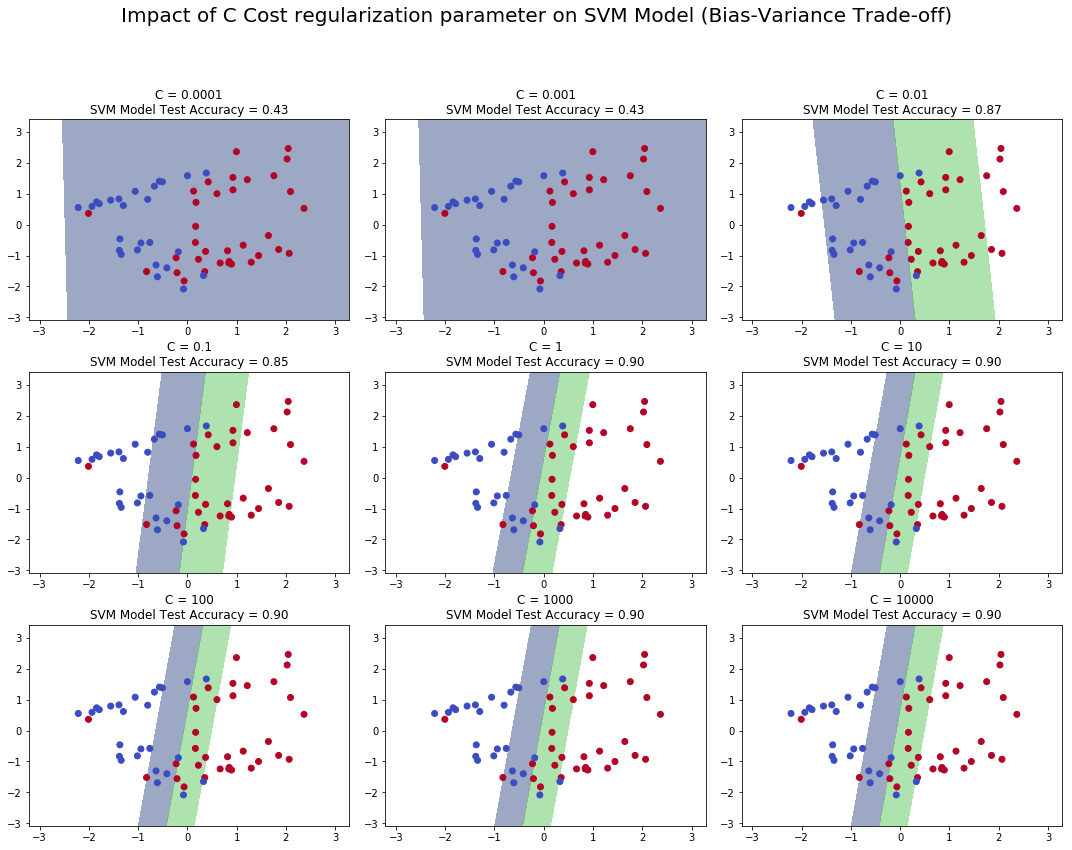

Analysis:
Small C paramter (C < 1): allows for more margin violations (misclassifications) and leads to a simpler model with higher bias and lower variance
Large C paramter(C > 1): penalizes margin violations more heavily and results in a more complex model with lower bias but potentially higher variance.


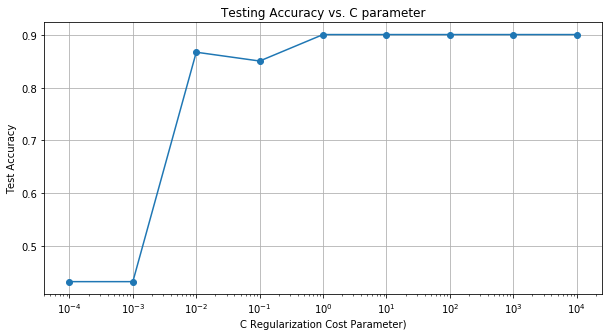

In [4]:
seed_n=2021
x_data, y_data = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=seed_n)
print("Split the dataset into training and testing sets")
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=seed_n)
print()
print("Create lists to save the accuracy values")
train_accuracies = []
test_accuracies = []
print()
print("Create a list with the range of C parameter values for the exercise")
c_parameter_values = [0.0001,0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
print()
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Impact of C Cost regularization parameter on SVM Model (Bias-Variance Trade-off)', fontsize=20)
print("Train and evaluate SVM models with different C parameter values")
for i, C in enumerate(c_parameter_values):
    svm = SVC(C=C, kernel='linear', random_state=seed_n)
    svm.fit(x_train, y_train)
    y_test_pred = svm.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)
    
    xx, yy = np.meshgrid(np.arange(x_test[:, 0].min() - 1, x_test[:, 0].max() + 1, 0.1),
                         np.arange(x_test[:, 1].min() - 1, x_test[:, 1].max() + 1, 0.1))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = axes[i // 3, i % 3]
    ax.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5)
    ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
    ax.set_title(f'C = {C}\nSVM Model Test Accuracy = {test_accuracy:.2f}')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

print("Analysis:")
print("Small C paramter (C < 1): allows for more margin violations (misclassifications) and leads to a simpler model with higher bias and lower variance")
print("Large C paramter(C > 1): penalizes margin violations more heavily and results in a more complex model with lower bias but potentially higher variance.")

# Plot the testing accuracies
plt.figure(figsize=(10, 5))
plt.semilogx(c_parameter_values, test_accuracies, marker='o', linestyle='-')
plt.xlabel('C Regularization Cost Parameter)')
plt.ylabel('Test Accuracy')
plt.title('Testing Accuracy vs. C parameter')
plt.grid()
plt.show()
plt.close();
del c_parameter_values
del test_accuracies
del x_data
del y_data 
del x_train
del x_test
del y_train
del y_test

- [Top](#table_contents) 

<a id="Q3"></a>
### Question 3 (Supervised Learning): Follow the 7-steps to model building for your selected ticker,

- (a) produce a model to predict positive moves (up trend) using Random Forest Classiffier.
- (b) tune hyperparameters for the estimator and present the best model.
- (c) investigate the prediction quality using area under ROC curve, confusion matrix and classification report.
- Note: Choice and number of hyperparameters to be optimized for the best model are design choices. Use of experiment tracking tools like MLFlow is allowed 





- [Top](#table_contents) 


**Objective:** 
- Produce a model to predict positive moves (up trend) using machine learning model as specified in the below section. 
- Your proposed solution should be comprehensive with thedetailed feature engineering and model architecture.

- Choose one ticker of your interest from the index, equity, ETF, crypto token, or commodity.
- predict trend only, for a short-term return (example: daily, 6 hours). Limit prediction to binomial classiffication: the dependent variable is best labeled [0, 1]. Avoid using [-1, 1] as class labels.
- Analysis should be comprehensive with detailed feature engineering, data pre-processing, model building, and evaluation.
- Devise your own approach on how to categorise extremely small near-zero returns (drop from training sample, group with positive/negative). The threshold will strongly depend on your ticker. Example: small positive returns below 0.25% can be labelled as negative.
- Number of features to include is a design choice. There is no one recommended set of features for all assets. Length of dataset is another design choice. If predicting short-term return sign (for daily move),then training and testing over up to 5-year period should be sufficient. Making sense of instructionsbelow is part of the task: the tutor will not assist in designing your computational implementation.
    
    

Table 1: Features to choose from. Do not overlap, eg $P_t$ and return for $t$.

| Feature | Formula | Description |
| --- | --- | --- |
| O-C, H-L | Open - Close, High - Low | of price |
| Sign | Sign $[r_t = ln(\frac{P_t}{P_{t-1}})]$ | sign of return, sign of momentum |
| Past Returns | $r_{t-1}$, $r_{t-2}$, ... | shift columns of $t - 1$ to obtain $t - 2$ |
| Momentum | $P_t - P_{t - k}$ | price change period k days |
| Moving Average | $SMA_t = \frac{1}{n}\sum_{i=0}^{n-1} P_{t - i}$ | simple moving average |
| Exponential MA | $EMA_t = EMA_{t-1} + \alpha[P_t - EMA_{t-1}]$ | recursive $\alpha = 2/(N_{obs} + 1)$ |





**Answer:**
***For the following question I will use the Russell 2000 ETF***

<a id="Q3step1"></a>
## Understand and Collect the data
- [Top](#table_contents) 

load the Russell 2000 ETF dataset
              Open   Close  Adj Close    High     Low      Volume
Dates                                                            
2016-04-08  109.61  109.11     109.11  110.07  108.63  26151735.0
2016-04-11  109.74  108.77     108.77  110.55  108.75  25842078.0
2016-04-12  108.79  109.94     109.94  110.18  108.43  25058742.0
2016-04-13  110.58  112.31     112.31  112.43  110.51  40534712.0
1900
Establishing date index
Size
Reviewing that there  are no Null values
Index(['open', 'close', 'adj close', 'high', 'low', 'volume'], dtype='object')
Graph of adj Close price of last 5 years


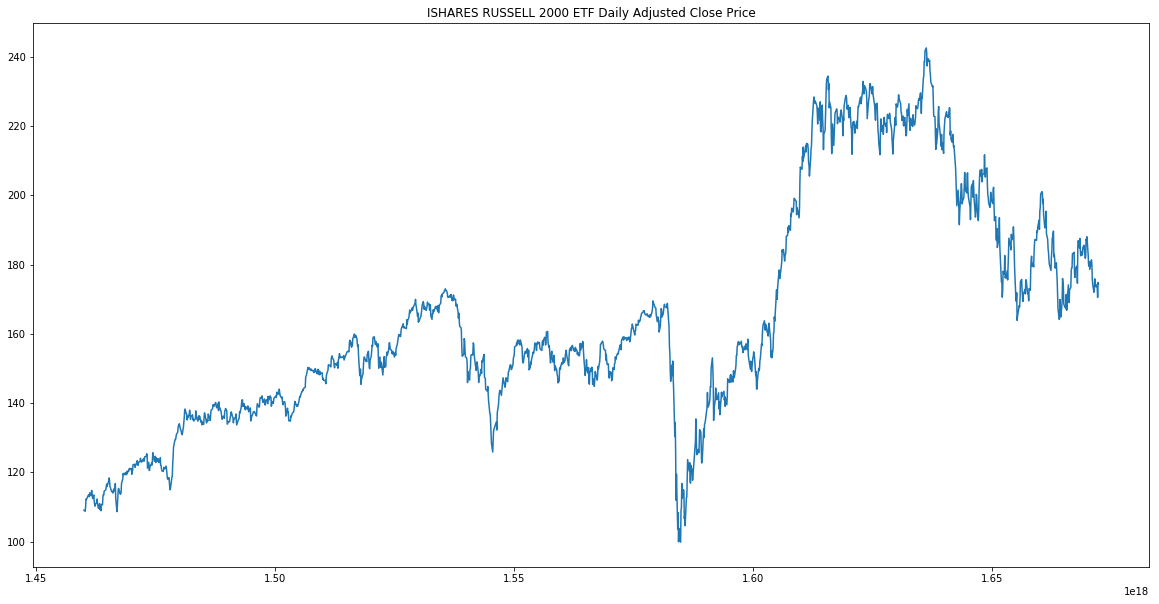

In [5]:
print("load the Russell 2000 ETF dataset")
df = pd.read_csv('C:/Alan_UK19/2022 CQF/june 2023 exam 3 october/russell.csv', index_col=0, parse_dates=True)
df=df.tail(1900)
df_original=df.copy()
print(df.head(4))
print(df.shape[0])
df = df.dropna()
df.columns = df.columns.str.lower()
print("Establishing date index")
#df["date"]=df.index
#df["year"]=df.index.year
#df["month"]=df.index.month
#df["day"]=df.index.day
#df["datetime_index"]= pd.to_datetime(dict(year=df.year, month=df.month, day=df.day))
#df['Date1'] = pd.to_datetime(pd.to_datetime(df['date']).apply(lambda x:x.strftime('%Y-%m-%d')))
print("Size")
df.shape
print("Reviewing that there  are no Null values")
df.isnull().sum() 
print(df.columns)
print("Graph of adj Close price of last 5 years")
plt.figure(figsize=(20,10))
plt.plot(df['adj close'])
plt.title('ISHARES RUSSELL 2000 ETF Daily Adjusted Close Price');

<a id="Q3step2"></a>
### Data Exploration
- [Top](#table_contents) 

generate the one-day return
Plot of 10 years of Russell 2000 daily return


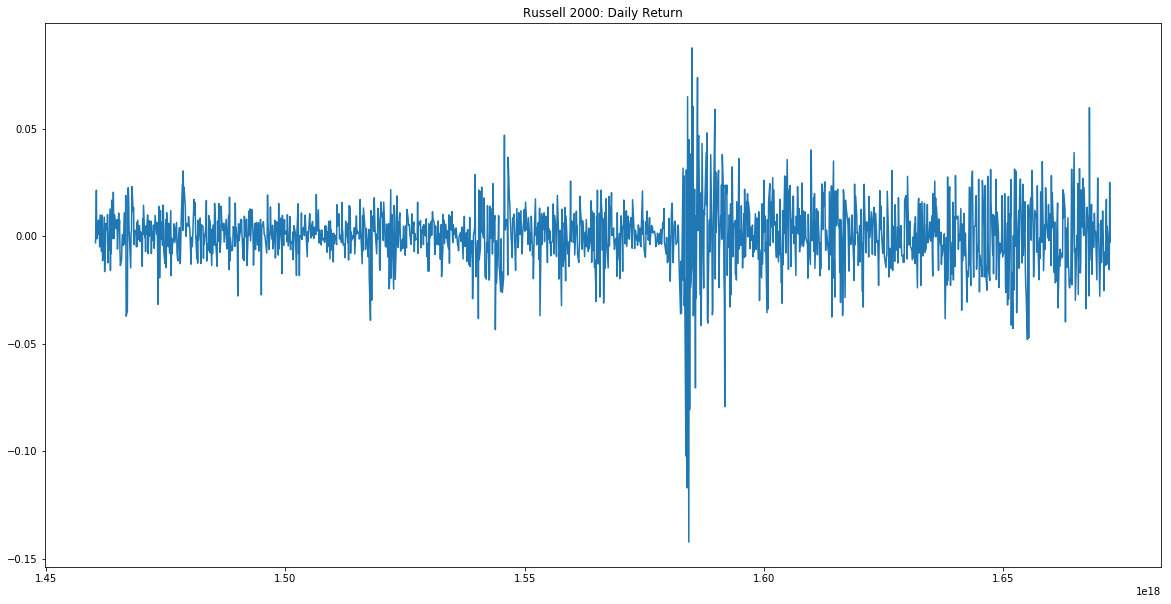

In [6]:
print("generate the one-day return")
df['1D_Return'] = np.log(df['adj close'])-np.log(df['adj close'].shift(1))
df = df.dropna()
df.head()
print("Plot of 10 years of Russell 2000 daily return")
plt.figure(figsize=(20,10))
plt.plot(df['1D_Return'])
plt.title('Russell 2000: Daily Return');

- [Top](#table_contents) 

plot of auto-correlation of the daily return (all possible lags)


Text(0.5,1,'Russell 2000: Daily Return Autocorrelation coefficients')

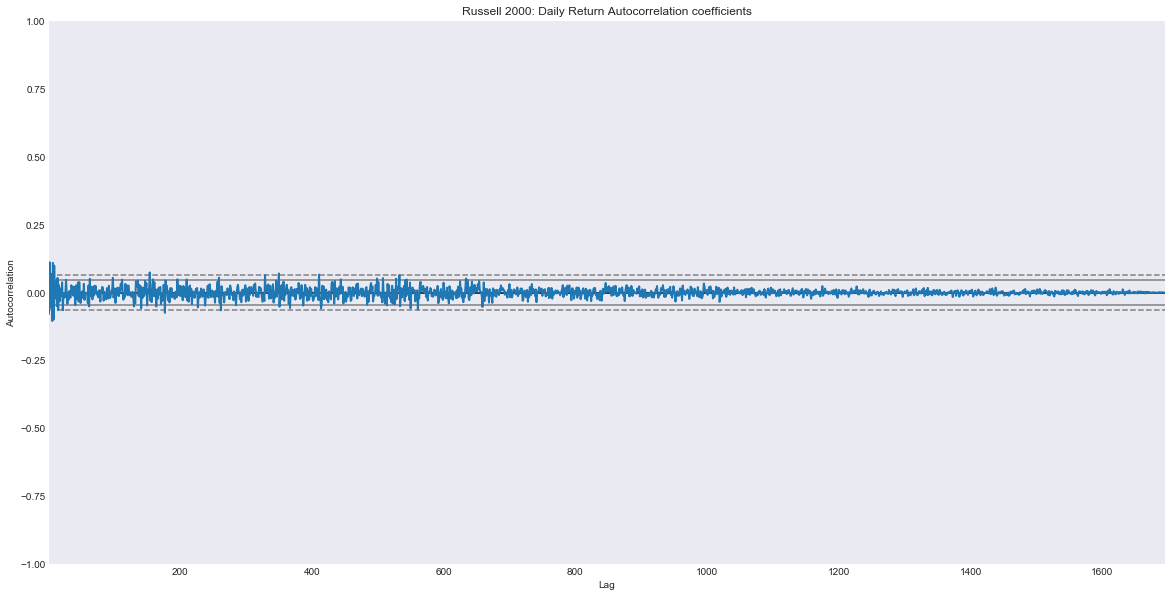

In [7]:
print("plot of auto-correlation of the daily return (all possible lags)")
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
autocorrelation_plot(df['1D_Return'].dropna(), linewidth=2.0)
plt.title('Russell 2000: Daily Return Autocorrelation coefficients')

<a id="Q3step3"></a>
### Creating Target
- [Top](#table_contents) 

In [8]:
print("Mean of the return")
df['1D_Return'].mean() * 100
print("Median of the return")
df['1D_Return'].median() * 100
print("Setting the target")
print("Creating the dummy variable to be dependent y variable")
print("dependent variable  labeled [0, 1]")
df['Target'] = np.where(df['1D_Return'] > df['1D_Return'].median(),1,0)
df['Target'] = df['Target'].shift(-1)
df.head()

Mean of the return
Median of the return
Setting the target
Creating the dummy variable to be dependent y variable
dependent variable  labeled [0, 1]


,open,close,adj close,high,low,volume,1D_Return,Target
Dates,,,,,,,,
2016-04-11,109.74,108.77,108.77,110.55,108.75,25842078.0,-0.003121,1.0
2016-04-12,108.79,109.94,109.94,110.18,108.43,25058742.0,0.010699,1.0
2016-04-13,110.58,112.31,112.31,112.43,110.51,40534712.0,0.021328,0.0
2016-04-14,112.26,112.17,112.17,112.70,111.88,25538576.0,-0.001247,1.0
2016-04-15,111.90,112.45,112.45,112.63,111.86,21176072.0,0.002493,1.0


<a id="Q3step4"></a>
### Feature Engineering and Penalized Classification
- [Top](#table_contents) 


In [9]:
print("data pre-processin Create new varaibles")
df['O - C'] = df['open'] - df['close']
df['H - L'] = df['high'] - df['low']
print("Daily log-returns")
df['Daily_Log_Returns'] = np.log(df['adj close']).diff().dropna()

print("Sign of Return")
df['Sign'] = np.where(df['1D_Return'] > 0, 1, -1)
print(" Past Returns")
print("lagged returns for 1, 3, 5, 8, 16, 22")
for n in (1, 3, 5, 8, 16, 22):
    df[str(n)+'D_LagReturn'] = df['1D_Return'].shift(n)

print("Momentum")   
print("Price change over periods of 1,2, 3, 5, 8, 16, 22")
for n in (1, 2,3,5,8,16, 22):
    df[str(n)+'D_Momentum'] = df['adj close'] - df['adj close'].shift(n)

print("Simple Moving Average")
print("Simple moving average of prices over periods of 3, 5, 10, 15, 22")
for n in (1, 3,5,10,8,15,16, 22):
    df[str(n)+'D_SMA'] = df['adj close'].rolling(n).mean()
    
print("Exponential Moving Average Exponential moving average with beta = 0.1, 0.3, 0.5, 0.7 and 0.9")
def EMA(df, beta):
    ema = [df['adj close'][0]]
    for i in range(1, len(df['adj close'])):
        ema.append(beta*ema[i-1] + (1-beta)*df['adj close'][i])
    return ema

for beta in (0.1, 0.3, 0.5, 0.7, 0.9):
    ema = EMA(df, beta)
    df[str(beta) + '_EMA'] = ema
    
print("Cumulative Return")  
print("Cumulative return over periods of 1, 2,3, 5, 8, 16, 22") 
for n in (1, 2,3,5,8,16, 22):
    df[str(n)+'D_CR'] = df['1D_Return'].rolling(n).sum()    
    
cols = df.drop('Target',axis=1).columns
print(len(cols))
database = df.copy()

data pre-processin Create new varaibles
Daily log-returns
Sign of Return
 Past Returns
lagged returns for 1, 3, 5, 8, 16, 22
Momentum
Price change over periods of 1,2, 3, 5, 8, 16, 22
Simple Moving Average
Simple moving average of prices over periods of 3, 5, 10, 15, 22
Exponential Moving Average Exponential moving average with beta = 0.1, 0.3, 0.5, 0.7 and 0.9
Cumulative Return
Cumulative return over periods of 1, 2,3, 5, 8, 16, 22
44




<a id="Q3step5"></a>
### Correlation Analysis
- [Top](#table_contents) 



Compute the correlation matrix among features
Plotting of features correlation matrix


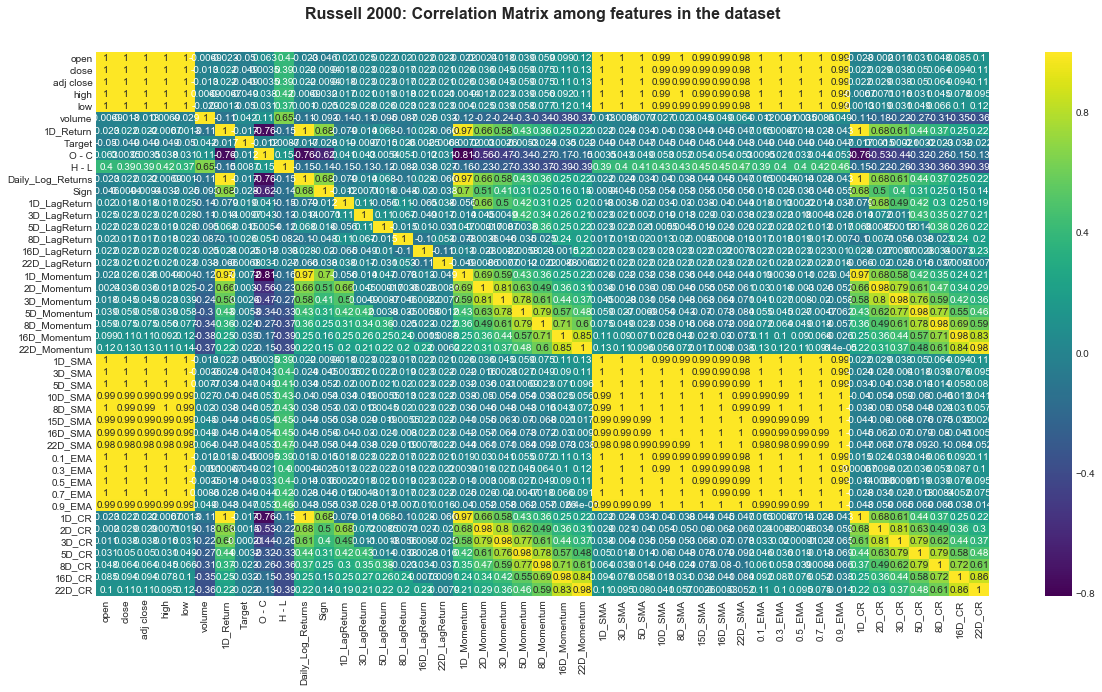

In [10]:
print("Compute the correlation matrix among features")
corrFeatMatrix = df.corr()

print("Plotting of features correlation matrix")
plt.figure(figsize=(20,10))
sns.heatmap(corrFeatMatrix, cmap="viridis",annot=True)
plt.title(
    'Russell 2000: Correlation Matrix among features in the dataset', 
    fontsize=16, y=1.05, weight='bold'
)
plt.show()


<a id="Q3step6"></a>
### Feature Selection
- [Top](#table_contents) 



In [11]:
print("Random forest importance for feature selection - Find the best parameters")
fs_X = df.dropna().drop("Target",axis=1)
fs_y = df.dropna()["Target"]

print()
print("Cross-validation")
tscv = TimeSeriesSplit(n_splits=5)

print()
print("Perform Gridsearch and fit")
param_grid = {"n_estimators":[5,10,20,30,40,50],
             "max_depth":[2,4,6,8,10,20,30]}
print()
fs_model = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=-1, cv=tscv, verbose=1, scoring='roc_auc')
fs_model.fit(fs_X, fs_y)
print()
print("Best Params and Best scores")
fs_model.best_params_ , fs_model.best_score_

Random forest importance for feature selection - Find the best parameters

Cross-validation

Perform Gridsearch and fit

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.0s



Best Params and Best scores


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   12.4s finished


({'max_depth': 20, 'n_estimators': 10}, 0.5279564031451358)

<a id="Q3step7"></a>
### Visualization of feature importance
- [Top](#table_contents) 


Random forest importance for feature selection - Fearure Importance
Standard random forest model
visualization of feature importance


Text(0.5,1,'Russell 2000: Feature Importance From Random Forest Model')

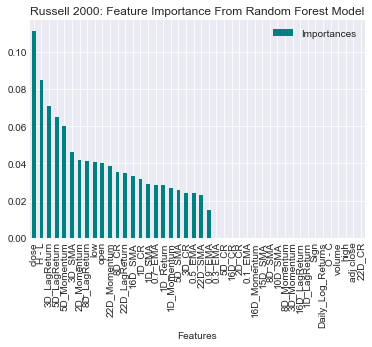

In [12]:
print("Random forest importance for feature selection - Fearure Importance")
fs_X = df.dropna().drop("Target",axis=1)
fs_y = df.dropna()["Target"]

print("Standard random forest model")
model = RandomForestClassifier(n_estimators=10,max_depth=2,random_state=1)
model.fit(fs_X, fs_y)
importances = model.feature_importances_

print("visualization of feature importance")
fs_importance = pd.DataFrame({"Features":cols, "Importances":importances}).set_index("Features")
fs_importance = fs_importance.sort_values("Importances", ascending=False)

fs_importance.plot.bar(color='teal')
plt.title("Russell 2000: Feature Importance From Random Forest Model")

In [13]:
print("Table summary with the importance")
fs_importance

Table summary with the importance


,Importances
Features,
close,0.111265
H - L,0.084739
3D_LagReturn,0.070840
5D_LagReturn,0.065024
5D_Momentum,0.059804
3D_SMA,0.046310
2D_Momentum,0.041894
8D_LagReturn,0.041315
low,0.040524


In [14]:
print("drop the variables with zero importance")
df_bu1=df.copy()
df.drop(list(fs_importance[fs_importance['Importances']==0].index),axis=1, inplace = True)
print("Show the remaining features")
df.head()

drop the variables with zero importance
Show the remaining features


,open,close,low,1D_Return,Target,H - L,3D_LagReturn,5D_LagReturn,8D_LagReturn,22D_LagReturn,...,3D_SMA,5D_SMA,16D_SMA,22D_SMA,0.5_EMA,0.7_EMA,0.9_EMA,1D_CR,3D_CR,8D_CR
Dates,,,,,,,,,,,,,,,,,,,,,
2016-04-11,109.74,108.77,108.75,-0.003121,1.0,1.80,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,108.770000,108.770000,108.770000,-0.003121,NaN,NaN
2016-04-12,108.79,109.94,108.43,0.010699,1.0,1.75,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,109.355000,109.121000,108.887000,0.010699,NaN,NaN
2016-04-13,110.58,112.31,110.51,0.021328,0.0,1.92,NaN,NaN,NaN,NaN,...,110.340000,NaN,NaN,NaN,110.832500,110.077700,109.229300,0.021328,0.028906,NaN
2016-04-14,112.26,112.17,111.88,-0.001247,1.0,0.82,-0.003121,NaN,NaN,NaN,...,111.473333,NaN,NaN,NaN,111.501250,110.705390,109.523370,-0.001247,0.030780,NaN
2016-04-15,111.90,112.45,111.86,0.002493,1.0,0.77,0.010699,NaN,NaN,NaN,...,112.310000,111.128,NaN,NaN,111.975625,111.228773,109.816033,0.002493,0.022574,NaN


<a id="Q3step8"></a>
### Analysis of Variance & t-test
- [Top](#table_contents) 


In [15]:
print("Analysis of Variance & t-test to identify significance")
print("Divide the dataset according to the target into two groups")
df1 = df.dropna()[df['Target']==1].drop('Target', axis=1)
df0 = df.dropna()[df['Target']==0].drop('Target', axis=1)
df1v=df1.copy()
df0v=df0.copy()

Analysis of Variance & t-test to identify significance
Divide the dataset according to the target into two groups


In [16]:
print("Analysis of Variance & t-test")
features, fs, fps, ts, tps = [], [], [], [], []

for feature in df.dropna().drop('Target', axis=1).columns:
    args = [list(df0[feature])]
    args.append(list(df1[feature]))
    # ANOVA
    f, p = stats.f_oneway(*args)
    features.append(feature)
    fs.append(f)
    fps.append(p)
    # t-test
    t, pval = stats.ttest_ind(*args)
    ts.append(t)
    tps.append(pval)
    
        
test = pd.DataFrame({"Features": features,
                     "F": fs,
                     "ANOVA p": fps,
                      "t": ts,
                      "t-test p": tps}).set_index("Features")
test.sort_values("F", ascending = False, inplace= True)
print("review significance of the variables")
test

Analysis of Variance & t-test
review significance of the variables


,F,ANOVA p,t,t-test p
Features,,,,
low,4.047914,0.044386,2.011943,0.044386
open,4.016372,0.045222,2.004089,0.045222
close,3.899080,0.048477,1.974609,0.048477
1D_SMA,3.899080,0.048477,1.974609,0.048477
3D_SMA,3.895104,0.048592,1.973602,0.048592
5D_SMA,3.891388,0.048699,1.972660,0.048699
0.5_EMA,3.886524,0.048840,1.971427,0.048840
0.7_EMA,3.835322,0.050350,1.958398,0.050350
0.9_EMA,3.472334,0.062579,1.863420,0.062579


In [17]:
print("list with variables with no predictive power")
list(test[test['ANOVA p']>0.06].index)

list with variables with no predictive power


['0.9_EMA',
 '16D_SMA',
 '22D_SMA',
 '8D_LagReturn',
 '22D_Momentum',
 '8D_CR',
 '1D_Return',
 '1D_CR',
 '5D_LagReturn',
 'H - L',
 '3D_LagReturn',
 '22D_LagReturn',
 '1D_Momentum',
 '5D_Momentum',
 '2D_Momentum',
 '3D_CR']

In [18]:
print("dropping list with variables with no predictive power")
df_bu2=df.copy()
df.drop(list(test[test['ANOVA p']>0.06].index),axis=1, inplace=True)
df.head()

dropping list with variables with no predictive power


,open,close,low,Target,1D_SMA,3D_SMA,5D_SMA,0.5_EMA,0.7_EMA
Dates,,,,,,,,,
2016-04-11,109.74,108.77,108.75,1.0,108.77,NaN,NaN,108.770000,108.770000
2016-04-12,108.79,109.94,108.43,1.0,109.94,NaN,NaN,109.355000,109.121000
2016-04-13,110.58,112.31,110.51,0.0,112.31,110.340000,NaN,110.832500,110.077700
2016-04-14,112.26,112.17,111.88,1.0,112.17,111.473333,NaN,111.501250,110.705390
2016-04-15,111.90,112.45,111.86,1.0,112.45,112.310000,111.128,111.975625,111.228773


<a id="Q3step9"></a>
### Clean and Transform data
- [Top](#table_contents) 


In [19]:
print("Clean data")
df_bu3=df.copy()
df.dropna(inplace=True)
print(df.head(2))
X = df.drop("Target", axis=1).values
y = pd.Series(df["Target"]).values
X_df = df.copy()
X_df = X_df.drop("Target", axis=1)
print(X_df.head(2))
y_df = df.copy()
y_df=y_df["Target"]
print(y_df.head(2))
df_columns=X_df.columns.tolist()

Clean data
              open   close     low  Target  1D_SMA  3D_SMA   5D_SMA  \
Dates                                                                 
2016-04-15  111.90  112.45  111.86     1.0  112.45  112.31  111.128   
2016-04-18  111.98  113.30  111.87     0.0  113.30  112.64  112.034   

               0.5_EMA     0.7_EMA  
Dates                               
2016-04-15  111.975625  111.228773  
2016-04-18  112.637812  111.850141  
              open   close     low  1D_SMA  3D_SMA   5D_SMA     0.5_EMA  \
Dates                                                                     
2016-04-15  111.90  112.45  111.86  112.45  112.31  111.128  111.975625   
2016-04-18  111.98  113.30  111.87  113.30  112.64  112.034  112.637812   

               0.7_EMA  
Dates                   
2016-04-15  111.228773  
2016-04-18  111.850141  
Dates
2016-04-15    1.0
2016-04-18    0.0
Name: Target, dtype: float64


<a id="Q3step10"></a>
### Modelling and Hyperparameters Tuning
- [Top](#table_contents) 


*** (a) produce a model to predict positive moves (up trend) using Random Forest Classiffier.***

*** (b) tune hyperparameters for the estimator and present the best model. *** 


In [20]:
print("Splitting the datasets into training and testing data.")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)
print()
print("Output the train and test data size")
print(f"Train and Test Size {len(X_train)}, {len(X_test)}")
print("Random Forest classifier with default hyperparameters.")
rf_classifier = RandomForestClassifier(random_state=2023)
print("Define a grid of hyperparameters to search. Hyperparameters to search using param_grid.")
param_grid = {
    'n_estimators': [50, 75, 100,150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2,3,4,5,8,10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 3,4]  # Minimum samples required at each leaf node
}
print()
print("GridSearchCV object to perform hyperparameter tuning with cross-validation.")
hp_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
print()
print("Fitting the grid search to the training data to find the best set of hyperparameters and the best model.")
hp_grid_search.fit(X_train, y_train)
print()
print("Show the best hyperparameters and therefore the best model")
best_params = hp_grid_search.best_params_
best_model = hp_grid_search.best_estimator_
print()
print("Showing the best model specification")
print()
print("Best Model Specification:")
print(best_model)

Splitting the datasets into training and testing data.

Output the train and test data size
Train and Test Size 1267, 423
Random Forest classifier with default hyperparameters.
Define a grid of hyperparameters to search. Hyperparameters to search using param_grid.

GridSearchCV object to perform hyperparameter tuning with cross-validation.

Fitting the grid search to the training data to find the best set of hyperparameters and the best model.

Show the best hyperparameters and therefore the best model

Showing the best model specification

Best Model Specification:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_sta

- [Top](#table_contents) 
### (c) investigate the prediction quality using area under ROC curve, confusion matrix and classification report.

In [21]:
print("Investigate prediction quality")
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

Investigate prediction quality



<a id="Q3step11"></a>
### ROC curve
- [Top](#table_contents) 


plot the ROC curve to visualize model performance.
Calculating the ROC curve
Plotting the ROC curve


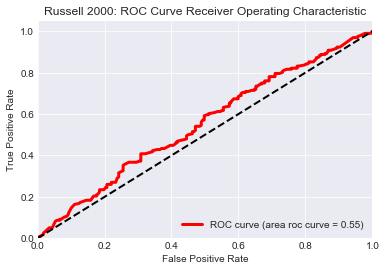

In [22]:
print("plot the ROC curve to visualize model performance.")
print("Calculating the ROC curve")
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("Plotting the ROC curve")
plt.figure()
plt.plot(fpr, tpr, color='red', lw=3, label=f'ROC curve (area roc curve = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Russell 2000: ROC Curve Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
plt.close();

In [23]:
print("Calculate the area under the ROC curve")
roc_auc = roc_auc_score(y_test, y_prob)
print(roc_auc)

Calculate the area under the ROC curve
0.5518744942911085



<a id="Q3step12"></a>
### Confusion Matrix
- [Top](#table_contents) 

Create a confusion matrix
Plot a heatmap of the confusion matrix


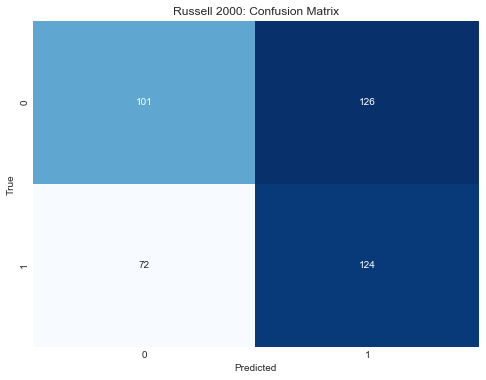

In [24]:
print("Create a confusion matrix")
conf_matrix = confusion_matrix(y_test, y_prob > 0.5)
print("Plot a heatmap of the confusion matrix")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Russell 2000: Confusion Matrix')
plt.show()
plt.close();

- [Top](#table_contents) 


<a id="Q3step13"></a>
### Classification Report
- [Top](#table_contents) 



In [25]:
print("Generate a classification report")
class_report = classification_report(y_test, y_pred)

print("Print results")
print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {best_model.score(X_test, y_test):.2f}")
print(f"Area under ROC Curve: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print()
print("Classification Report:")
print(class_report)

Generate a classification report
Print results
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test Accuracy: 0.53
Area under ROC Curve: 0.55
Confusion Matrix:
[[101 126]
 [ 72 124]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.44      0.51       227
         1.0       0.50      0.63      0.56       196

    accuracy                           0.53       423
   macro avg       0.54      0.54      0.53       423
weighted avg       0.54      0.53      0.53       423




<a id="Q3step14"></a>
### Backtesting and Trading Strategy
- [Top](#table_contents) 


In [26]:
print("Adds the probability and the predicitions to the dataset")
print(y_pred.shape[0])
print(y_prob.shape[0])
print(X_test.shape[0])
print()
test_dataset_with_predictions = pd.DataFrame(X_test,columns = df_columns)
test_dataset_with_predictions['Target'] = y_test
test_dataset_with_predictions['Predicted'] = y_prob
test_dataset_with_predictions['Prediction'] = y_pred
test_dataset_with_predictions['y_pred'] = y_pred
print(test_dataset_with_predictions)

Adds the probability and the predicitions to the dataset
423
423
423

       open   close      low  1D_SMA      3D_SMA   5D_SMA     0.5_EMA  \
0    228.08  228.84  227.100  228.84  228.466667  226.548  227.995177   
1    230.85  227.99  225.790  227.99  228.426667  227.830  227.992589   
2    225.72  224.89  224.140  224.89  227.240000  227.656  226.441294   
3    227.21  225.99  224.920  225.99  226.290000  227.232  226.215647   
4    224.60  223.29  220.955  223.29  224.723333  226.200  224.752824   
..      ...     ...      ...     ...         ...      ...         ...   
418  174.33  173.60  170.670  173.60  174.140000  173.760  174.155033   
419  173.48  174.39  172.340  174.39  174.630000  173.764  174.272517   
420  174.36  173.22  172.580  173.22  173.736667  174.006  173.746258   
421  173.18  170.53  170.340  170.53  172.713333  173.528  172.138129   
422  171.72  174.85  171.400  174.85  172.866667  173.318  173.494065   

        0.7_EMA  Target  Predicted  Prediction  y_pre

In [ ]:
print("backtesting strategy")

In [27]:
print("Create a new dataframe to outsample data")
df11 = test_dataset_with_predictions.copy()
df_backtest=df.copy()
df1 = df_backtest[-len(y_test):]
print("Add predictions to the test dataset")
df1['Target2'] = y_test
df1['Predicted'] = y_prob
df1['Prediction'] = y_pred
df1['y_pred'] = y_pred
df1['1D_Return'] = database['1D_Return']
print("Predict the signal and store in predicted signal column")
df1['Signal'] = df1["y_pred"]
print("Calculate the strategy returns")
df1['Strategy'] = df1['1D_Return'] * df1['Signal'].shift(1).fillna(0)

Create a new dataframe to outsample data
Add predictions to the test dataset
Predict the signal and store in predicted signal column
Calculate the strategy returns


In [28]:
print("Comparing accumulative results")      
df1['1D_Return'].sum(), df1['Strategy'].sum()
print("The result form the strategy is higher thant the accumualted return of the ETF")

Comparing accumulative results
The result form the strategy is higher thant the accumualted return of the ETF


Visualize


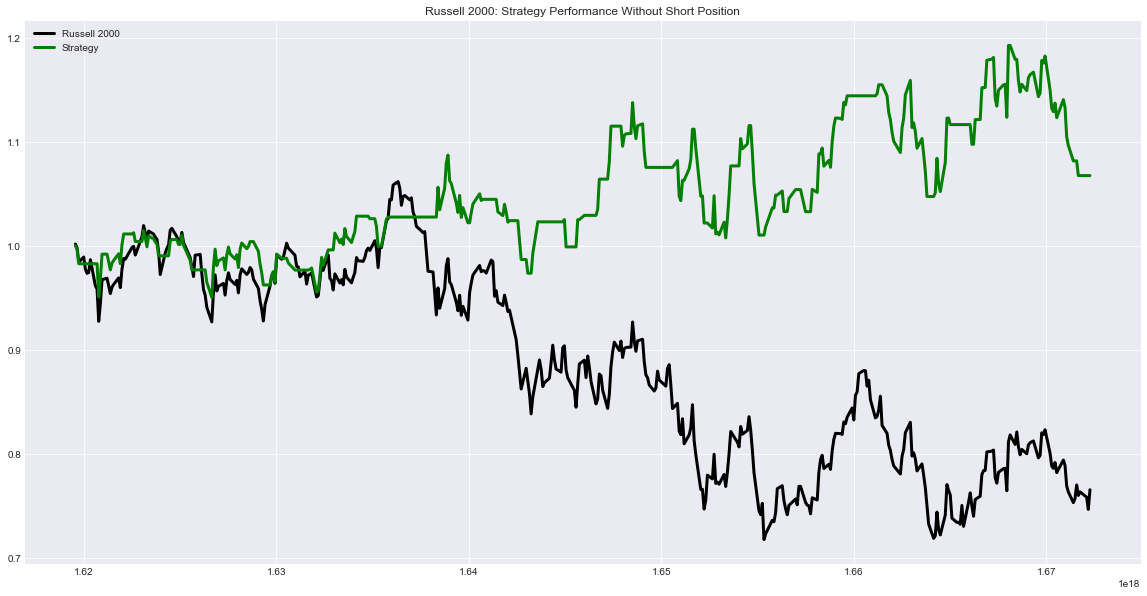

In [29]:
print("Visualize")
cumret = df1['1D_Return'].cumsum().apply(np.exp)
cumstg = df1['Strategy'].cumsum().apply(np.exp)
plt.figure(figsize=(20,10))
plt.plot(cumret,color='black', lw= 3, label ='Russell 2000')
plt.plot(cumstg,color='green', lw=3, label ='Strategy')
plt.legend()
plt.title('Russell 2000: Strategy Performance Without Short Position');

In [30]:
print("The cumulative return of 'buy and hold' during the period is ", round((cumret[-1]-1)*100, 2), "%")
print("The cumulative return of the strategy during the period is ", round((cumstg[-1]-1)*100, 2), "%")

The cumulative return of 'buy and hold' during the period is  -23.46 %
The cumulative return of the strategy during the period is  6.75 %


In [31]:
print("The strategy using the Random Forest Clasiffier using and the Hyperparameters tuning methodology achieves a higher return than just holding the ETF") 


The strategy using the Random Forest Clasiffier using and the Hyperparameters tuning methodology achieves a higher return than just holding the ETF


- [Top](#table_contents) 
    
### Backtesting with short position

In [32]:
print("Short position")
y_pred_ = y_pred.copy()
print("changing symbol for short position")
y_pred_[y_pred_==0] = -1
print("Create a new dataframe to subsume outsample data")
df2 = df_backtest[-len(y_test):]
df2['Target2'] = y_test
df2['Predicted'] = y_prob
df2['Prediction'] = y_pred
df2['y_pred'] = y_pred
print(df1)
df2['1D_Return'] = database['1D_Return']
print("Predict the signal and store in predicted signal column")
df2['Signal'] = y_pred_ 
print("Calculate the strategy returns")
df2['Strategy'] = df2['1D_Return'] * df2['Signal'].shift(1).fillna(0)
print("Localize index")
df2.index = pd.to_datetime(df1.index)


Short position
Create a new dataframe to subsume outsample data
              open   close      low  Target  1D_SMA      3D_SMA   5D_SMA  \
Dates                                                                      
2021-04-28  228.08  228.84  227.100     0.0  228.84  228.466667  226.548   
2021-04-29  230.85  227.99  225.790     0.0  227.99  228.426667  227.830   
2021-04-30  225.72  224.89  224.140     1.0  224.89  227.240000  227.656   
2021-05-03  227.21  225.99  224.920     0.0  225.99  226.290000  227.232   
2021-05-04  224.60  223.29  220.955     0.0  223.29  224.723333  226.200   
...            ...     ...      ...     ...     ...         ...      ...   
2022-12-22  174.33  173.60  170.670     1.0  173.60  174.140000  173.760   
2022-12-23  173.48  174.39  172.340     0.0  174.39  174.630000  173.764   
2022-12-27  174.36  173.22  172.580     0.0  173.22  173.736667  174.006   
2022-12-28  173.18  170.53  170.340     1.0  170.53  172.713333  173.528   
2022-12-29  171.72  174.

In [33]:
print("Comparing accumulative results")
df2['1D_Return'].sum(), df2['Strategy'].sum()

Comparing accumulative results


(-0.26738890449989583, 0.39977507292521697)

Backtesting visualization


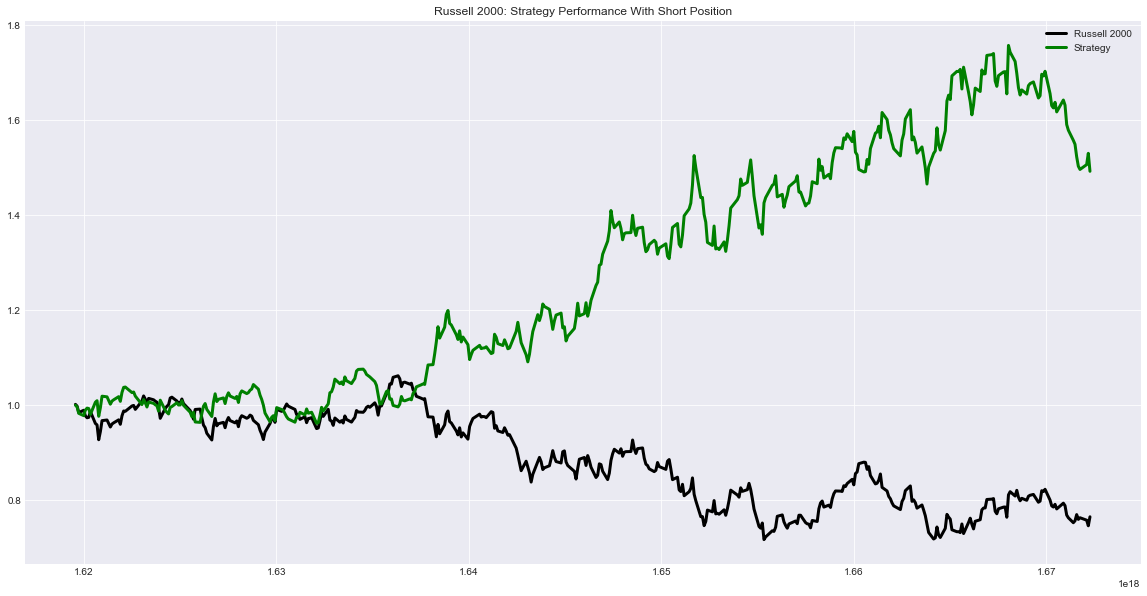

In [34]:
print("Backtesting visualization")
cumret_ = df2['1D_Return'].cumsum().apply(np.exp)
cumstg_ = df2['Strategy'].cumsum().apply(np.exp)

plt.figure(figsize=(20,10))
plt.plot(cumret_, color='black', lw= 3,  label ='Russell 2000')
plt.plot(cumstg_, color='green', lw=3, label ='Strategy')
plt.legend()
plt.title('Russell 2000: Strategy Performance With Short Position');

In [35]:
print("The cumulative return of holding the ETF during the period is ", round((cumret_[-1]-1)*100, 2), "%")
print("The cumulative return of the RFC strategy during the period is ", round((cumstg_[-1]-1)*100, 2), "%")

print("The strategy using the Random Forest Clasiffier  and using the Hyperparameters tuning methodology achieves a higher return when deciding to short the ETF") 


The cumulative return of holding the ETF during the period is  -23.46 %
The cumulative return of the RFC strategy during the period is  49.15 %
The strategy using the Random Forest Clasiffier  and using the Hyperparameters tuning methodology achieves a higher return when deciding to short the ETF


- [Top](#table_contents) 